In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.mixture as skmix
%matplotlib inline

In [2]:
df = pd.read_csv('requests_export000.tsv', delimiter = '\t')

In [3]:
df.head(5)
print(len(df))

15566499


In [4]:
df = df.dropna()

In [5]:
df_reduced = df.sample(10000)

In [20]:
df_reduced.head()

,URL,User Agent,UUID,TimeStamp,ClassID,URL1,URL2,URL3,URL4,URL5,URL6,URL7,URL8,URL9,ClassID1,ClassID2,ClassID3
9237227,/courses/166,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,a5e9b18f00846f5d55dc49041a442c8e,2014-09-23 14:09:27,05d0532840f04928dfdd86296c51189d,0,0,0,0,0,0,0,0,0,1,0,0
13157894,/courses/166/files/577/preview?verifier=NwilNK...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,7ed92d191b05e6d1400d385f935c8747,2014-11-12 19:51:55,05d0532840f04928dfdd86296c51189d,0,0,0,0,0,0,0,0,0,1,0,0
7989018,/api/v1/courses/164/pages/course-related-resou...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,3447feecce046beca179320f26d080c1,2014-09-05 20:47:48,a6ff862f8df9f99bec63a4096890db10,0,0,0,0,0,0,0,0,0,0,0,1
12970248,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,a23368df1b6bbf80c3aeb99493d1bfa1,2014-11-10 23:27:13,05d0532840f04928dfdd86296c51189d,0,0,1,0,0,0,0,0,0,1,0,0
10488172,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...,c27f4523d6975f848c9e1602556e2ad9,2014-10-09 04:47:33,05d0532840f04928dfdd86296c51189d,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
new_header = ['URL', 'User Agent', 'Unknown', 'UUID', 'TimeStamp', 'ClassID']
df_reduced.columns = new_header

In [8]:
df_reduced.head()

,URL,User Agent,Unknown,UUID,TimeStamp,ClassID
9237227,/courses/166,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2458878,a5e9b18f00846f5d55dc49041a442c8e,2014-09-23 14:09:27,05d0532840f04928dfdd86296c51189d
13157894,/courses/166/files/577/preview?verifier=NwilNK...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,167369,7ed92d191b05e6d1400d385f935c8747,2014-11-12 19:51:55,05d0532840f04928dfdd86296c51189d
7989018,/api/v1/courses/164/pages/course-related-resou...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,185840,3447feecce046beca179320f26d080c1,2014-09-05 20:47:48,a6ff862f8df9f99bec63a4096890db10
12970248,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,153438,a23368df1b6bbf80c3aeb99493d1bfa1,2014-11-10 23:27:13,05d0532840f04928dfdd86296c51189d
10488172,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...,95412,c27f4523d6975f848c9e1602556e2ad9,2014-10-09 04:47:33,05d0532840f04928dfdd86296c51189d


In [9]:
del df_reduced['Unknown']

In [21]:
df_reduced.head()

,URL,User Agent,UUID,TimeStamp,ClassID,URL1,URL2,URL3,URL4,URL5,URL6,URL7,URL8,URL9,ClassID1,ClassID2,ClassID3
9237227,/courses/166,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,a5e9b18f00846f5d55dc49041a442c8e,2014-09-23 14:09:27,05d0532840f04928dfdd86296c51189d,0,0,0,0,0,0,0,0,0,1,0,0
13157894,/courses/166/files/577/preview?verifier=NwilNK...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,7ed92d191b05e6d1400d385f935c8747,2014-11-12 19:51:55,05d0532840f04928dfdd86296c51189d,0,0,0,0,0,0,0,0,0,1,0,0
7989018,/api/v1/courses/164/pages/course-related-resou...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,3447feecce046beca179320f26d080c1,2014-09-05 20:47:48,a6ff862f8df9f99bec63a4096890db10,0,0,0,0,0,0,0,0,0,0,0,1
12970248,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,a23368df1b6bbf80c3aeb99493d1bfa1,2014-11-10 23:27:13,05d0532840f04928dfdd86296c51189d,0,0,1,0,0,0,0,0,0,1,0,0
10488172,/api/v1/courses/166/pages/home-page/revisions/...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...,c27f4523d6975f848c9e1602556e2ad9,2014-10-09 04:47:33,05d0532840f04928dfdd86296c51189d,0,0,0,0,0,0,0,0,0,1,0,0


In [142]:
#cluster
# the links below for URLs 1 thru 9 are the three most clicked links for each course, based on the sorting code that Connie did. 

dfnew = df_reduced

dfnew['URL1'] = np.where(dfnew['URL']=='/api/v1/courses/166/ping', 1, 0)
dfnew['URL2'] = np.where(dfnew['URL']=='/api/v1/courses/166/pages/virtual-sites/revisions/latest?summary=true', 1, 0)
dfnew['URL3'] = np.where(dfnew['URL']=='/api/v1/courses/166/pages/dr-millers-lecture-003-recordings/revisions/latest?summary=true', 1, 0)

dfnew['URL4'] = np.where(dfnew['URL']=='/api/v1/courses/158/pages/sketching-videos/revisions/latest?summary=true', 1, 0)
dfnew['URL5'] = np.where(dfnew['URL']=='/api/v1/courses/158/ping', 1, 0)
dfnew['URL6'] = np.where(dfnew['URL']=='/courses/158', 1, 0)

dfnew['URL7'] = np.where(dfnew['URL']=='/api/v1/courses/164/pages/blogging/revisions/latest?summary=true', 1, 0)
dfnew['URL8'] = np.where(dfnew['URL']=='/api/v1/courses/164/ping', 1, 0)
dfnew['URL9'] = np.where(dfnew['URL']=='/courses/164/', 1, 0)


dfnew['ClassID1'] = np.where(dfnew['ClassID']=='05d0532840f04928dfdd86296c51189d', 1, 0)
dfnew['ClassID2'] = np.where(dfnew['ClassID']=='08acd1cae6c97712fc8dbe400c35b47d', 1, 0)
dfnew['ClassID3'] = np.where(dfnew['ClassID']=='a6ff862f8df9f99bec63a4096890db10', 1, 0)

dfnew = dfnew.drop('URL', 1)
dfnew = dfnew.drop('ClassID', 1)
dfnew.head() 

10000


In [140]:
#Normalize the data. (When working with a smaller subset of the data, there were NAN columns that need to be removed if you want to see the clustering
#analysis) 
df_filtered = dfnew[['URL1', 'URL2', 'URL3', 'URL4', 'URL5', 'URL6', 'URL7', 'URL8','URL9', 'ClassID1','ClassID2','ClassID3',]]
df_norm = df_filtered.apply(lambda x: (x - x.mean()) / x.std())
df_norm.head()

,URL1,URL2,URL3,URL4,URL5,URL6,URL7,URL8,URL9,ClassID1,ClassID2,ClassID3
9237227,-0.23109,-0.16434,-0.156134,-0.086925,-0.06723,-0.03466,-0.094758,-0.067976,-0.017322,0.401440,-0.263217,-0.282676
13157894,-0.23109,-0.16434,-0.156134,-0.086925,-0.06723,-0.03466,-0.094758,-0.067976,-0.017322,0.401440,-0.263217,-0.282676
7989018,-0.23109,-0.16434,-0.156134,-0.086925,-0.06723,-0.03466,-0.094758,-0.067976,-0.017322,-2.490781,-0.263217,3.537268
12970248,-0.23109,-0.16434,6.404116,-0.086925,-0.06723,-0.03466,-0.094758,-0.067976,-0.017322,0.401440,-0.263217,-0.282676
10488172,-0.23109,-0.16434,-0.156134,-0.086925,-0.06723,-0.03466,-0.094758,-0.067976,-0.017322,0.401440,-0.263217,-0.282676


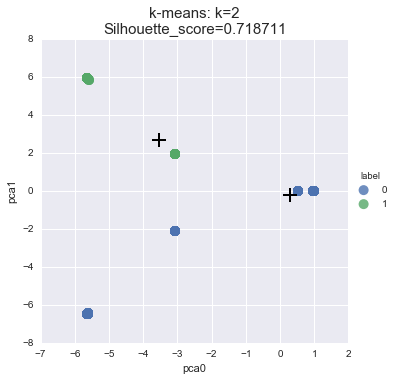

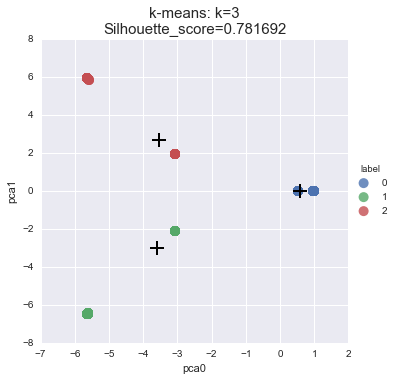

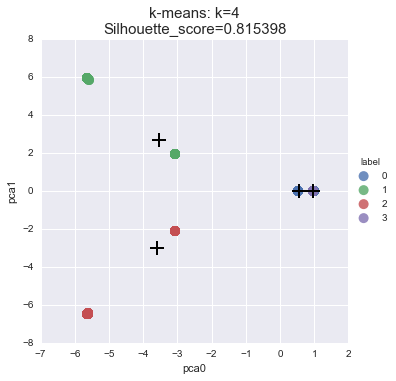

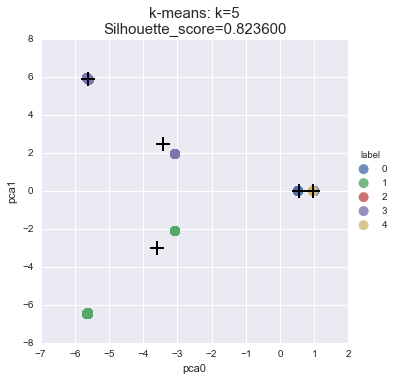

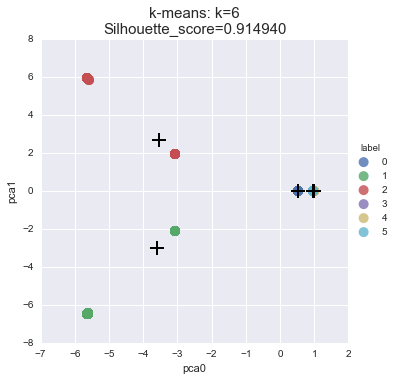

In [13]:
#kmeans clustering visualization

pca_model = skd.PCA(n_components=2).fit(df_norm)
pca_data = pca_model.transform(df_norm)
df_pca = pd.DataFrame(pca_data, columns=['pca0', 'pca1'])

for k in range(2,7):
    kmeans_model = skc.KMeans(k).fit(df_norm)
    centroids = kmeans_model.cluster_centers_
    centroids_pca = pca_model.transform(centroids)
    cluster_labels = kmeans_model.labels_
    df_pca['label'] = cluster_labels
    silh_score = skm.silhouette_score(df_norm, cluster_labels)
    
    plt.figure()
    f = sns.lmplot(x='pca0', y='pca1', data=df_pca, 
                   hue='label', fit_reg=False, 
                   scatter_kws={'s': 100})
    f.ax.scatter(centroids_pca[:,0], centroids_pca[:,1], 
                 marker='+', s=200, linewidths=2, color='black')
    plt.title('k-means: k=%d\nSilhouette_score=%f'%(
                k, silh_score), fontsize=15)

In [139]:
max_label_id = np.max(kmeans_model.labels_)
print('There are %d clusters'%max_label_id)
for i in range(1, max_label_id + 1):
    members = df_norm.index[cluster_labels == i]
    if i == 1:
        cluster1 = members
    elif i == 2:
        cluster2 = members
    elif i == 3:
        cluster3 = members
    elif i == 4:
        cluster4 = members
    elif i == 5:
        cluster5 = members
print(len(cluster5))

There are 5 clusters
238


In [80]:
#######CLUSTER 1 ANALYSIS
df_cluster1 = pd.DataFrame(columns=('URL', 'User Agent', 'TimeStamp', 'UUID', 'ClassID'))
for member in cluster1:
    df_cluster1.loc[len(df_cluster1)] = df_reduced.ix[member]
df_cluster1.head()

,URL,User Agent,TimeStamp,UUID,ClassID
0,/api/v1/courses/158/pages/me250-home-page/revi...,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:32.0) G...,2014-10-03 20:25:07,3a4ad0ec6eeb12d53f60563e3d732026,08acd1cae6c97712fc8dbe400c35b47d
1,/api/v1/courses/158/pages/me250-home-page/revi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-12-12 06:24:00,eaa2ed547c291798305355c0ae871aad,08acd1cae6c97712fc8dbe400c35b47d
2,/api/v1/courses/158/pages/me250-home-page/revi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,2014-11-13 04:06:24,ec5bee2fa25afb593ffea7f76b42bcda,08acd1cae6c97712fc8dbe400c35b47d
3,/api/v1/courses/158/pages/me250-home-page/revi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,2014-11-08 03:29:52,fb7f98e6f225545d69095d6e7eb27dc0,08acd1cae6c97712fc8dbe400c35b47d
4,/api/v1/courses/158/pages/me250-home-page/revi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-10-22 02:04:42,bf30ec5e8ded7c682aa7c820f7a4c7ba,08acd1cae6c97712fc8dbe400c35b47d


/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


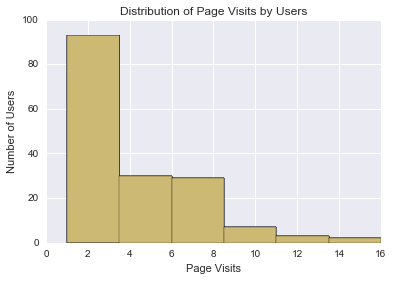

In [91]:
#Descriptive Stats
df_cluster1.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=6, legend=False,
                                                    title = 'Distribution of Page Visits by Users')
plt.xlabel('Page Visits')
plt.ylabel('Number of Users')

In [103]:
df_cluster1.groupby('UUID').count().mean()['URL'] #average number of page views for each student in this group

3.9512195121951219

In [81]:
#Time Series
df_cluster1['date'] = pd.to_datetime(df_cluster1['TimeStamp'])
df_cluster1.index = df_cluster1['date']
del df_cluster1['date']
del df_cluster1['TimeStamp']

In [82]:
df_cluster1 = df_cluster1.sort()
df_cluster1.head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,URL,User Agent,UUID,ClassID
date,,,,
2014-08-31 21:47:56,/courses/158/folders/1389?page_view_id=2aff593...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,d85bd79aba765954f4955c68990331f0,08acd1cae6c97712fc8dbe400c35b47d
2014-09-01 18:33:37,/api/v1/courses/158/pages/me250-home-page/revi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...,2bdf591f72e13015b39c574544fce225,08acd1cae6c97712fc8dbe400c35b47d
2014-09-01 19:00:49,/courses/158/discussion_topics,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,a04c43bdec74d649bd98f0377a6ebf15,08acd1cae6c97712fc8dbe400c35b47d
2014-09-02 00:54:18,/courses/158/details,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,c24dff30d6fcbf0366648e6512a8802d,08acd1cae6c97712fc8dbe400c35b47d
2014-09-02 13:31:17,/api/v1/courses/158,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,423e26e95a50ce72dae50e3b8e7bbe65,08acd1cae6c97712fc8dbe400c35b47d


In [83]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_cluster1['HofD'] = [r.hour for r in df_cluster1.index]
df_cluster1['DofM'] = [r.day for r in df_cluster1.index]
df_cluster1.head()

,URL,User Agent,UUID,ClassID,HofD,DofM
date,,,,,,
2014-08-31 21:47:56,/courses/158/folders/1389?page_view_id=2aff593...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,d85bd79aba765954f4955c68990331f0,08acd1cae6c97712fc8dbe400c35b47d,21,31
2014-09-01 18:33:37,/api/v1/courses/158/pages/me250-home-page/revi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...,2bdf591f72e13015b39c574544fce225,08acd1cae6c97712fc8dbe400c35b47d,18,1
2014-09-01 19:00:49,/courses/158/discussion_topics,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,a04c43bdec74d649bd98f0377a6ebf15,08acd1cae6c97712fc8dbe400c35b47d,19,1
2014-09-02 00:54:18,/courses/158/details,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,c24dff30d6fcbf0366648e6512a8802d,08acd1cae6c97712fc8dbe400c35b47d,0,2
2014-09-02 13:31:17,/api/v1/courses/158,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,423e26e95a50ce72dae50e3b8e7bbe65,08acd1cae6c97712fc8dbe400c35b47d,13,2


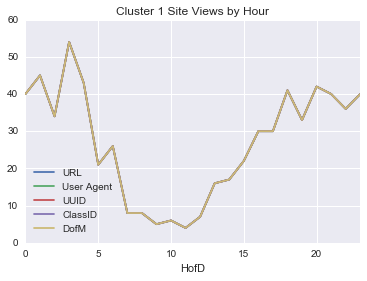

In [85]:
df_cluster1.groupby('HofD').count().plot(title='Cluster 1 Site Views by Hour')

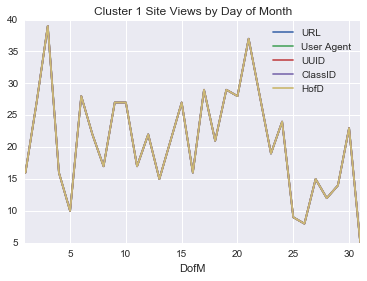

In [86]:
df_cluster1.groupby('DofM').count().plot(title='Cluster 1 Site Views by Day of Month')

In [104]:
#######CLUSTER 2 ANALYSIS
df_cluster2 = pd.DataFrame(columns=('URL', 'User Agent', 'TimeStamp', 'UUID', 'ClassID'))
for member in cluster2:
    df_cluster2.loc[len(df_cluster2)] = df_reduced.ix[member]
df_cluster2.head()

,URL,User Agent,TimeStamp,UUID,ClassID
0,/api/v1/courses/164/pages/course-related-resou...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,2014-09-05 20:47:48,3447feecce046beca179320f26d080c1,a6ff862f8df9f99bec63a4096890db10
1,/courses/164,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5)...,2014-09-24 15:24:47,113bf4d649847427ce4ee905bdad86b0,a6ff862f8df9f99bec63a4096890db10
2,/courses/164/grades,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-10-02 05:41:37,9a34d948138ea3e768121fd0658ac7ed,a6ff862f8df9f99bec63a4096890db10
3,/courses/164/external_tools/61,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,2014-10-23 12:44:22,430355f1b6c7a3bef6267f9bc53ec6ef,a6ff862f8df9f99bec63a4096890db10
4,/courses/164/quizzes/459/submissions/backup?us...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...,2014-10-04 18:23:12,2138ed03733b8c3d885af8ed4b0b1dfc,a6ff862f8df9f99bec63a4096890db10


/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


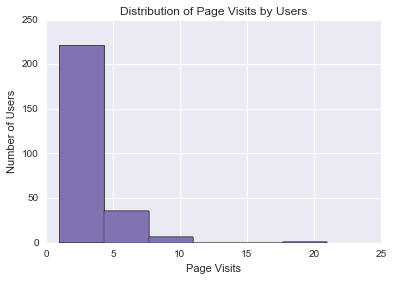

In [105]:
#Descriptive Stats
df_cluster2.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=6, legend=False,
                                                    title = 'Distribution of Page Visits by Users')
plt.xlabel('Page Visits')
plt.ylabel('Number of Users')

In [106]:
df_cluster2.groupby('UUID').count().mean()['URL'] #average number of page views for each student in this group

2.8030303030303032

In [107]:
#Time Series
df_cluster2['date'] = pd.to_datetime(df_cluster2['TimeStamp'])
df_cluster2.index = df_cluster2['date']
del df_cluster2['date']
del df_cluster2['TimeStamp']

In [108]:
df_cluster2 = df_cluster2.sort()
df_cluster2.head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,URL,User Agent,UUID,ClassID
date,,,,
2014-08-08 14:56:51,/api/v1/courses/164/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10
2014-08-12 23:33:17,/api/v1/courses/164/pages/readings/revisions/l...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10
2014-08-12 23:51:28,/api/v1/courses/164/pages/readings/revisions/l...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10
2014-08-13 21:38:39,/api/v1/courses/164/pages/blogging/revisions/l...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,e615051e71cf6f13c86385f3d6e0317c,a6ff862f8df9f99bec63a4096890db10
2014-08-14 22:09:26,/api/v1/courses/164/pages/instructors/revision...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10


In [109]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_cluster2['HofD'] = [r.hour for r in df_cluster2.index]
df_cluster2['DofM'] = [r.day for r in df_cluster2.index]
df_cluster2.head()

,URL,User Agent,UUID,ClassID,HofD,DofM
date,,,,,,
2014-08-08 14:56:51,/api/v1/courses/164/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10,14,8
2014-08-12 23:33:17,/api/v1/courses/164/pages/readings/revisions/l...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10,23,12
2014-08-12 23:51:28,/api/v1/courses/164/pages/readings/revisions/l...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10,23,12
2014-08-13 21:38:39,/api/v1/courses/164/pages/blogging/revisions/l...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,e615051e71cf6f13c86385f3d6e0317c,a6ff862f8df9f99bec63a4096890db10,21,13
2014-08-14 22:09:26,/api/v1/courses/164/pages/instructors/revision...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,eb8eef99616f3825f89ac2c4e7fdc62a,a6ff862f8df9f99bec63a4096890db10,22,14


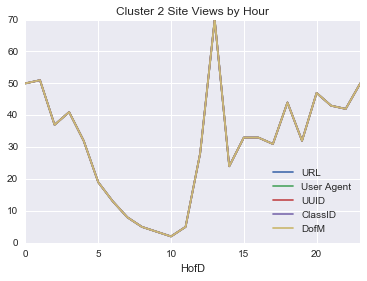

In [110]:
df_cluster2.groupby('HofD').count().plot(title='Cluster 2 Site Views by Hour')

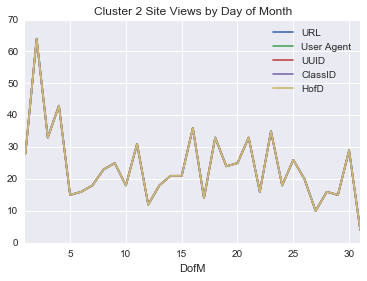

In [111]:
df_cluster2.groupby('DofM').count().plot(title='Cluster 2 Site Views by Day of Month')

In [112]:
#######CLUSTER 3 ANALYSIS
df_cluster3 = pd.DataFrame(columns=('URL', 'User Agent', 'TimeStamp', 'UUID', 'ClassID'))
for member in cluster3:
    df_cluster3.loc[len(df_cluster3)] = df_reduced.ix[member]
df_cluster3.head()

,URL,User Agent,TimeStamp,UUID,ClassID
0,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,2014-11-21 02:16:00,6108fbfd4bb5edd4d71fbbc086b3dc42,05d0532840f04928dfdd86296c51189d
1,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,2014-11-08 19:01:28,3ac5ec2d6be2c369a9f5d34df3554cf7,05d0532840f04928dfdd86296c51189d
2,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_0...,2014-11-05 20:24:03,4e0123692663b20b454b723ce30548e1,05d0532840f04928dfdd86296c51189d
3,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-09-10 14:31:01,9473e2dcbe6938bb5441d0a9d7ff7e05,05d0532840f04928dfdd86296c51189d
4,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,2014-09-21 22:52:06,2457fbc269793615dd242013eac3d470,05d0532840f04928dfdd86296c51189d


/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


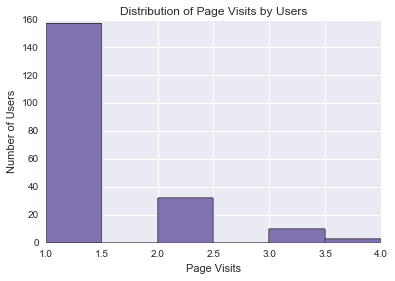

In [113]:
#Descriptive Stats
df_cluster3.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=6, legend=False,
                                                    title = 'Distribution of Page Visits by Users')
plt.xlabel('Page Visits')
plt.ylabel('Number of Users')

In [114]:
df_cluster3.groupby('UUID').count().mean()['URL'] #average number of page views for each student in this group

1.301980198019802

In [115]:
#Time Series
df_cluster3['date'] = pd.to_datetime(df_cluster3['TimeStamp'])
df_cluster3.index = df_cluster3['date']
del df_cluster3['date']
del df_cluster3['TimeStamp']

In [116]:
df_cluster3 = df_cluster3.sort()
df_cluster3.head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,URL,User Agent,UUID,ClassID
date,,,,
2014-09-02 17:33:25,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,f6614fd264046995a6037b8cfe4021e7,05d0532840f04928dfdd86296c51189d
2014-09-05 02:25:42,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,b94c02ff31af56fef1bccb66aa152661,05d0532840f04928dfdd86296c51189d
2014-09-07 21:15:02,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,0dc04e5a381c3a1d228d8df0d5e58966,05d0532840f04928dfdd86296c51189d
2014-09-08 12:59:19,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6ec20a87eacbc5bd08531d4728341639,05d0532840f04928dfdd86296c51189d
2014-09-08 13:02:32,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,93e51a97a2353383d7fe1d357e89c276,05d0532840f04928dfdd86296c51189d


In [117]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_cluster3['HofD'] = [r.hour for r in df_cluster3.index]
df_cluster3['DofM'] = [r.day for r in df_cluster3.index]
df_cluster3.head()

,URL,User Agent,UUID,ClassID,HofD,DofM
date,,,,,,
2014-09-02 17:33:25,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,f6614fd264046995a6037b8cfe4021e7,05d0532840f04928dfdd86296c51189d,17,2
2014-09-05 02:25:42,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,b94c02ff31af56fef1bccb66aa152661,05d0532840f04928dfdd86296c51189d,2,5
2014-09-07 21:15:02,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,0dc04e5a381c3a1d228d8df0d5e58966,05d0532840f04928dfdd86296c51189d,21,7
2014-09-08 12:59:19,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6ec20a87eacbc5bd08531d4728341639,05d0532840f04928dfdd86296c51189d,12,8
2014-09-08 13:02:32,/api/v1/courses/166/pages/virtual-sites/revisi...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,93e51a97a2353383d7fe1d357e89c276,05d0532840f04928dfdd86296c51189d,13,8


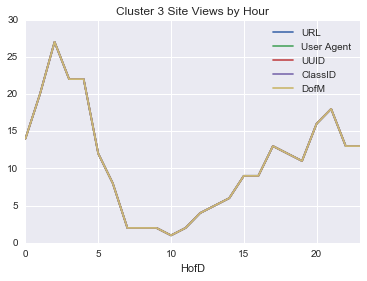

In [118]:
df_cluster3.groupby('HofD').count().plot(title='Cluster 3 Site Views by Hour')

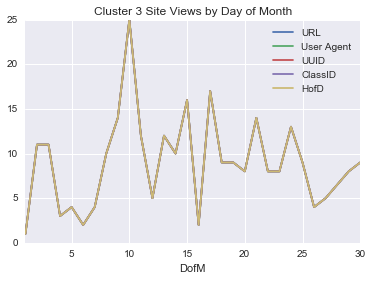

In [119]:
df_cluster3.groupby('DofM').count().plot(title='Cluster 3 Site Views by Day of Month')

In [120]:
#######CLUSTER 4 ANALYSIS
df_cluster4 = pd.DataFrame(columns=('URL', 'User Agent', 'TimeStamp', 'UUID', 'ClassID'))
for member in cluster4:
    df_cluster4.loc[len(df_cluster4)] = df_reduced.ix[member]
df_cluster4.head()

,URL,User Agent,TimeStamp,UUID,ClassID
0,/api/v1/courses/166/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,2014-12-14 23:17:05,99945860957b0e1ea1ee043eb6c0e56a,05d0532840f04928dfdd86296c51189d
1,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-12-03 15:32:55,96670526f2388ab299fca4734362c7d9,05d0532840f04928dfdd86296c51189d
2,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-10-06 16:17:09,a8bc7be4845743ed8f0fdac0c23cf22d,05d0532840f04928dfdd86296c51189d
3,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-11-19 21:50:27,325c1b5272574a77eb87b39213441305,05d0532840f04928dfdd86296c51189d
4,/api/v1/courses/166/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,2014-10-09 23:23:55,c6daa99162d2e0caaf356ab2316ee6fe,05d0532840f04928dfdd86296c51189d


/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


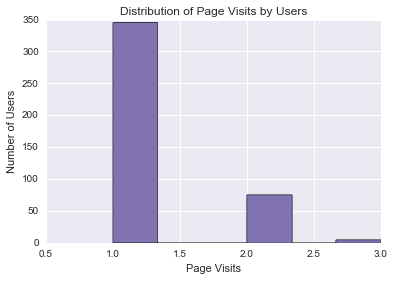

In [121]:
#Descriptive Stats
df_cluster4.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=6, legend=False,
                                                    title = 'Distribution of Page Visits by Users')
plt.xlabel('Page Visits')
plt.ylabel('Number of Users')

In [122]:
df_cluster4.groupby('UUID').count().mean()['URL'] #average number of page views for each student in this group

1.195754716981132

In [123]:
#Time Series
df_cluster4['date'] = pd.to_datetime(df_cluster4['TimeStamp'])
df_cluster4.index = df_cluster4['date']
del df_cluster4['date']
del df_cluster4['TimeStamp']

In [124]:
df_cluster4 = df_cluster4.sort()
df_cluster4.head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,URL,User Agent,UUID,ClassID
date,,,,
2014-08-21 18:44:35,/api/v1/courses/166/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5)...,a73a161be4b117c8904599121d9f1315,05d0532840f04928dfdd86296c51189d
2014-08-26 17:39:32,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,3e3285a3f7fc205049a674f35246ec10,05d0532840f04928dfdd86296c51189d
2014-08-27 00:25:15,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,93d0dd5ce186ff96c09c0d08ec55eb86,05d0532840f04928dfdd86296c51189d
2014-09-02 13:02:07,/api/v1/courses/166/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,db997cbf81d3504c0b8cf5656656a59a,05d0532840f04928dfdd86296c51189d
2014-09-03 15:35:35,/api/v1/courses/166/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,7f98a03a18b8816086d9c40d99d49282,05d0532840f04928dfdd86296c51189d


In [125]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_cluster4['HofD'] = [r.hour for r in df_cluster4.index]
df_cluster4['DofM'] = [r.day for r in df_cluster4.index]
df_cluster4.head()

,URL,User Agent,UUID,ClassID,HofD,DofM
date,,,,,,
2014-08-21 18:44:35,/api/v1/courses/166/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5)...,a73a161be4b117c8904599121d9f1315,05d0532840f04928dfdd86296c51189d,18,21
2014-08-26 17:39:32,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,3e3285a3f7fc205049a674f35246ec10,05d0532840f04928dfdd86296c51189d,17,26
2014-08-27 00:25:15,/api/v1/courses/166/ping,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,93d0dd5ce186ff96c09c0d08ec55eb86,05d0532840f04928dfdd86296c51189d,0,27
2014-09-02 13:02:07,/api/v1/courses/166/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...,db997cbf81d3504c0b8cf5656656a59a,05d0532840f04928dfdd86296c51189d,13,2
2014-09-03 15:35:35,/api/v1/courses/166/ping,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,7f98a03a18b8816086d9c40d99d49282,05d0532840f04928dfdd86296c51189d,15,3


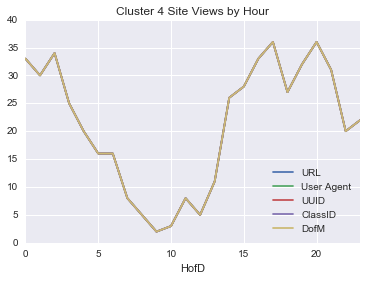

In [126]:
df_cluster4.groupby('HofD').count().plot(title='Cluster 4 Site Views by Hour')

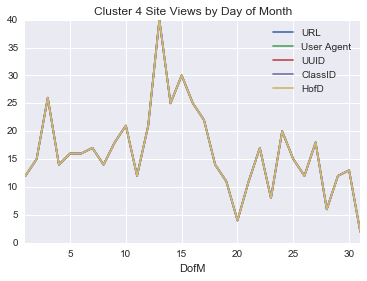

In [127]:
df_cluster4.groupby('DofM').count().plot(title='Cluster 4 Site Views by Day of Month')

In [128]:
#######CLUSTER 5 ANALYSIS
df_cluster5 = pd.DataFrame(columns=('URL', 'User Agent', 'TimeStamp', 'UUID', 'ClassID'))
for member in cluster5:
    df_cluster5.loc[len(df_cluster5)] = df_reduced.ix[member]
df_cluster5.head()

,URL,User Agent,TimeStamp,UUID,ClassID
0,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-11-10 23:27:13,a23368df1b6bbf80c3aeb99493d1bfa1,05d0532840f04928dfdd86296c51189d
1,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2014-11-17 22:12:19,88842a61fa06828f9db6ac43b4a2401c,05d0532840f04928dfdd86296c51189d
2,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,2014-12-10 17:10:38,7921f730292ce28177d1c64deacf3b1e,05d0532840f04928dfdd86296c51189d
3,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...,2014-11-16 05:21:44,ade3957103c6a62bd12893f9f4b63a55,05d0532840f04928dfdd86296c51189d
4,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...,2014-12-07 23:44:13,2d73ffead88db0762f4df97060dd4964,05d0532840f04928dfdd86296c51189d


/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


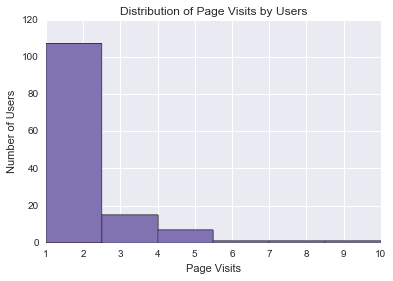

In [129]:
#Descriptive Stats
df_cluster5.groupby('UUID').count().sort(['URL']).plot(kind='hist', bins=6, legend=False,
                                                    title = 'Distribution of Page Visits by Users')
plt.xlabel('Page Visits')
plt.ylabel('Number of Users')

In [130]:
df_cluster5.groupby('UUID').count().mean()['URL'] #average number of page views for each student in this group

1.803030303030303

In [131]:
#Time Series
df_cluster5['date'] = pd.to_datetime(df_cluster5['TimeStamp'])
df_cluster5.index = df_cluster5['date']
del df_cluster5['date']
del df_cluster5['TimeStamp']

In [132]:
df_cluster5 = df_cluster5.sort()
df_cluster5.head()

/Users/andycho/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,URL,User Agent,UUID,ClassID
date,,,,
2014-09-05 15:51:12,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.2; WOW64; rv:31.0) G...,e0af9226342996dd18502403649ae30c,05d0532840f04928dfdd86296c51189d
2014-09-08 02:12:56,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5)...,53a8426b9561e50d5c40ee827df02b62,05d0532840f04928dfdd86296c51189d
2014-09-08 17:00:05,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,b25c37a8e3c8e8413b743f95d3c670bc,05d0532840f04928dfdd86296c51189d
2014-09-08 21:01:20,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,fac6e0994b3f58ed031a437873c04e79,05d0532840f04928dfdd86296c51189d
2014-09-10 00:35:32,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,5d269ab0999eb64e0e43086e5eb0fc9a,05d0532840f04928dfdd86296c51189d


In [133]:
#bin them into days or something and then use the count to see how many are in a certain day or hour
df_cluster5['HofD'] = [r.hour for r in df_cluster5.index]
df_cluster5['DofM'] = [r.day for r in df_cluster5.index]
df_cluster5.head()

,URL,User Agent,UUID,ClassID,HofD,DofM
date,,,,,,
2014-09-05 15:51:12,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.2; WOW64; rv:31.0) G...,e0af9226342996dd18502403649ae30c,05d0532840f04928dfdd86296c51189d,15,5
2014-09-08 02:12:56,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_5)...,53a8426b9561e50d5c40ee827df02b62,05d0532840f04928dfdd86296c51189d,2,8
2014-09-08 17:00:05,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,b25c37a8e3c8e8413b743f95d3c670bc,05d0532840f04928dfdd86296c51189d,17,8
2014-09-08 21:01:20,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,fac6e0994b3f58ed031a437873c04e79,05d0532840f04928dfdd86296c51189d,21,8
2014-09-10 00:35:32,/api/v1/courses/166/pages/dr-millers-lecture-0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,5d269ab0999eb64e0e43086e5eb0fc9a,05d0532840f04928dfdd86296c51189d,0,10


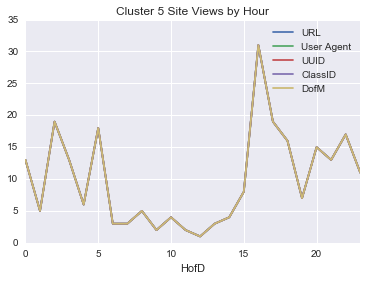

In [134]:
df_cluster5.groupby('HofD').count().plot(title='Cluster 5 Site Views by Hour')

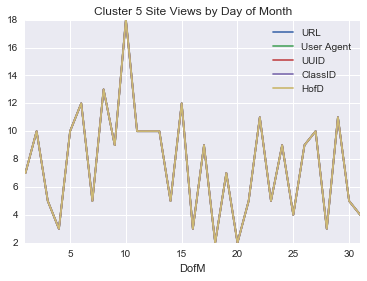

In [135]:
df_cluster5.groupby('DofM').count().plot(title='Cluster 5 Site Views by Day of Month')